In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import json
import copy

In [2]:
%matplotlib inline

In [3]:
if not os.path.exists('assets/CE'):
    os.makedirs('assets/CE')

### Field Profile

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


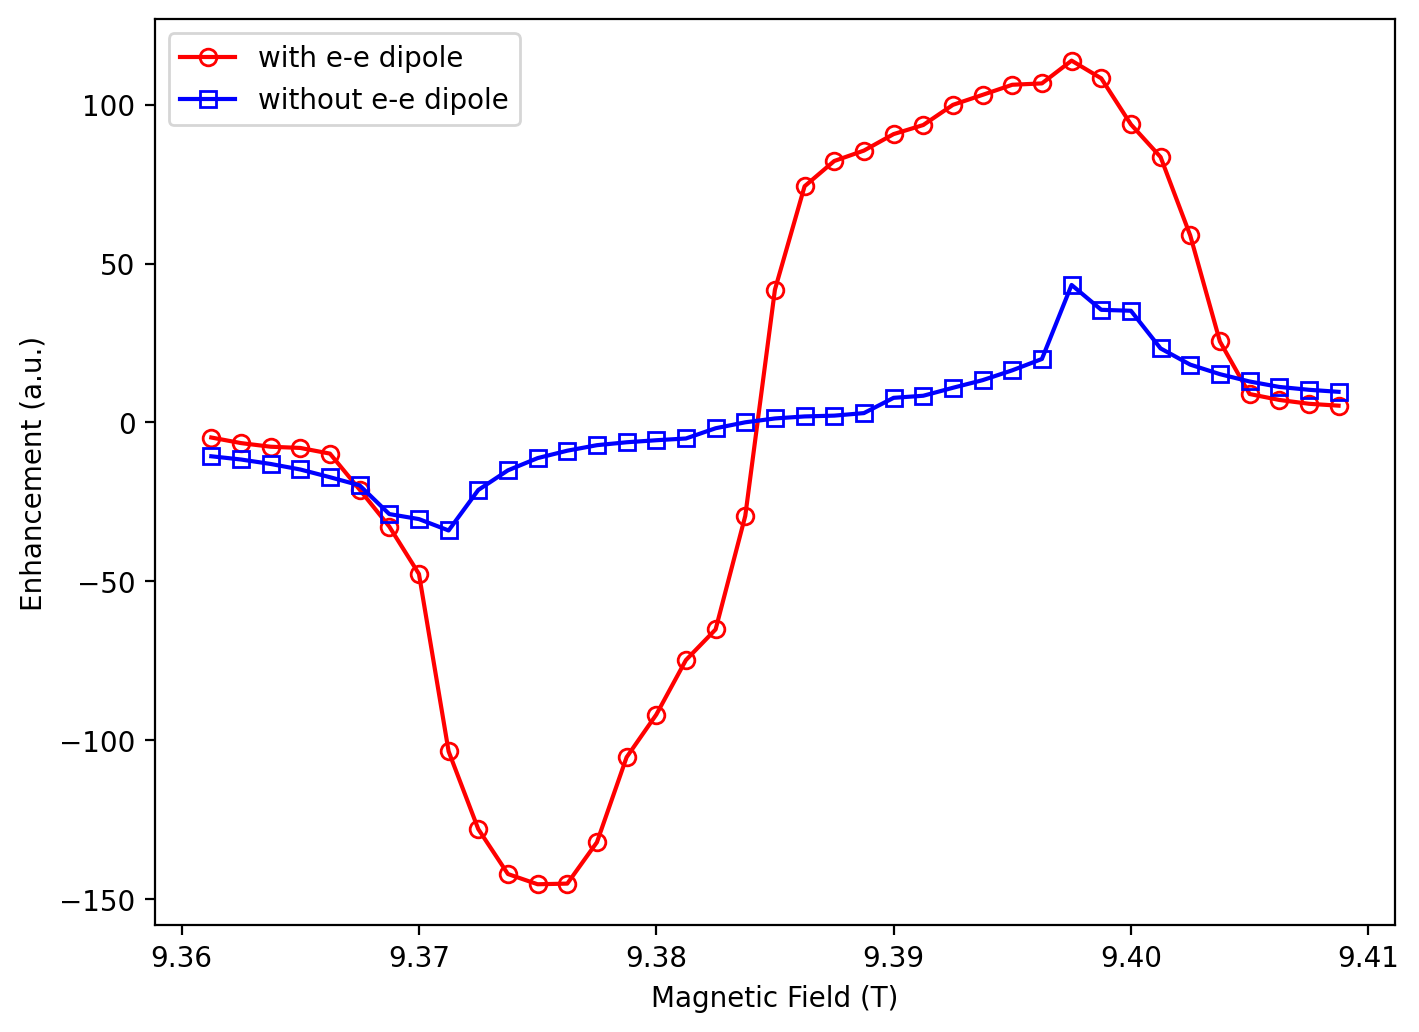

In [12]:
dir_name = 'outputs/CE'
# Total time: 14056.638 seconds.
file_name = 'ee7p5A_eH_TEMPO_group1-2-8_p3_263p45GHz_a0b100g310_zcw55_400MHz_fp.result'
file_path = os.path.join(dir_name, file_name)
df = pd.read_csv(file_path, skiprows=2, header=None)

# Total time: 1763.9 seconds.
file_name2 = 'eeNodipole_eH_TEMPO_group1-8_p3_263p45GHz_a0b100g310_zcw144_400MHz_fp.result'
file_path2 = os.path.join(dir_name, file_name2)
df2 = pd.read_csv(file_path2, skiprows=2, header=None)

fig = plt.figure(figsize=(8, 6), dpi=200)
plt.plot(df[0], df[1], 'ro-', markerfacecolor='none', label='with e-e dipole')
plt.plot(df2[0], df2[1], 'bs-', markerfacecolor='none', label='without e-e dipole')
plt.ylabel('Enhancement (a.u.)')
plt.xlabel('Magnetic Field (T)')
plt.legend()
plt.savefig('assets/CE/fieldprofile.ps')
plt.savefig('assets/CE/fieldprofile.png')
plt.show()

### BuildUp & Eigen Values

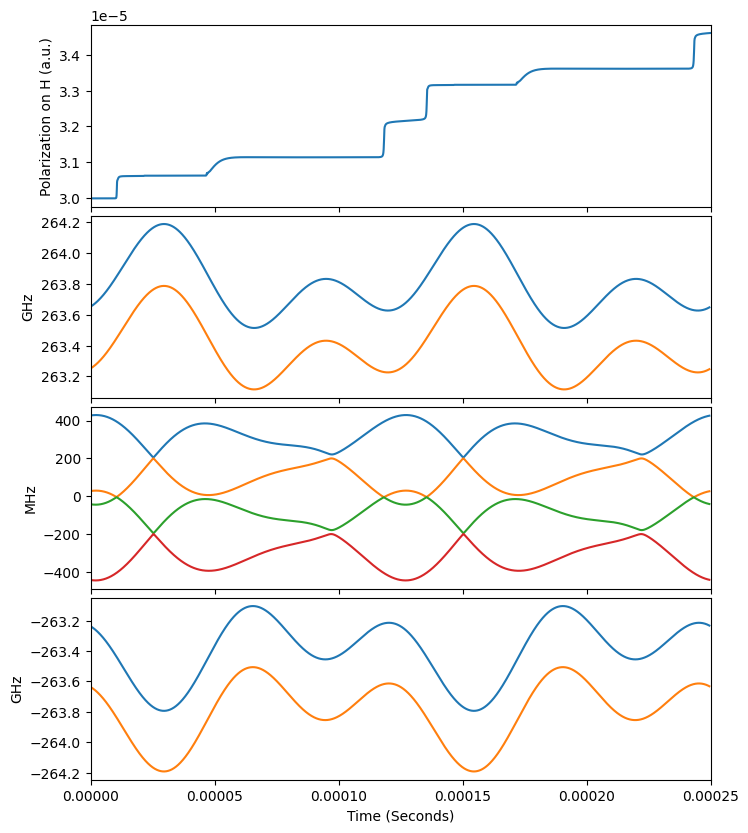

In [21]:
dir_name = 'outputs/CE'
# took 0.97 seconds
file_name = 'ee7p5A_eH_TEMPO_p250us_263p45GHz_a0b100g310_9p39T_400MHz_eigenvals.result'
file_path_eigenval = os.path.join(dir_name, file_name)
df_eigenvals = pd.read_csv(file_path_eigenval, skiprows=2, header=None)

dir_name = 'outputs/CE'
# took 6.833 seconds
file_name = 'ee7p5A_eH_TEMPO_p250us_263p45GHz_a0b100g310_9p39T_400MHz_buildup.result'
file_path_buildup = os.path.join(dir_name, file_name)
df_buildup = pd.read_csv(file_path_buildup, skiprows=2, header=None)

fig, axes = plt.subplots(4, 1, figsize=(8, 10), dpi=100, sharex=True)
axes[0].plot(df_buildup[0], df_buildup[1])
axes[0].set_xlim(0, 250e-6)
axes[0].set_ylabel('Polarization on H (a.u.)')
axes[1].plot(df_eigenvals[0], df_eigenvals[8]/1e9)
axes[1].plot(df_eigenvals[0], df_eigenvals[7]/1e9)
axes[1].set_ylabel('GHz')
axes[2].plot(df_eigenvals[0], df_eigenvals[6]/1e6)
axes[2].plot(df_eigenvals[0], df_eigenvals[5]/1e6)
axes[2].plot(df_eigenvals[0], df_eigenvals[4]/1e6)
axes[2].plot(df_eigenvals[0], df_eigenvals[3]/1e6)
axes[2].set_ylabel('MHz')
axes[3].plot(df_eigenvals[0], df_eigenvals[2]/1e9)
axes[3].plot(df_eigenvals[0], df_eigenvals[1]/1e9)
axes[3].set_ylabel('GHz')
axes[3].set_xlabel('Time (Seconds)')
plt.subplots_adjust(hspace=0.05)
plt.savefig('assets/CE/buildup_eigen_vals_2rotor_periods.ps')
plt.savefig('assets/CE/buildup_eigen_vals_2rotor_periods.png')
plt.show()